In [12]:
# import warnings
# warnings.filterwarnings('ignore')
import numpy as np
# np.set_printoptions(threshold=np.nan)
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
# import sklearn
# from sklearn import svm
from sklearn.svm import SVC
# from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
import time
from sklearn import preprocessing
import csv
import time

In [13]:
%cd "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/female/Esr1_3/svm/"
data=pd.read_excel('/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/female/Esr1_3/svm/metadata.xlsx')

/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/female/Esr1_3/svm


In [14]:
##Use SVM to classify data ###
def ephys_svm(filename,predict,params,iterations,test_data,df):
    parameters = [{'C': [.001,.01,.1,1,10,100,1000], 'kernel': ['linear']},
                  {'C': [.001,.01,.1,1,10,100,1000], 'gamma': [.001,.01,.1,1,10,100,1000], 'kernel': ['rbf']}]  
#     df=summarydata[summarydata.label != label_tag]

    ##normalize columns (except for 'predict' column)##
    df_norm=df[params]
    df_predict=df[predict]
    df_norm=pd.DataFrame(preprocessing.scale(df_norm))
    df_predict.reset_index(drop=True, inplace=True)
    df_norm.reset_index(drop=True, inplace=True)
    df=pd.concat([df_norm,df_predict],axis=1)
    df=df.dropna()
    headers=params+predict
    df.columns=headers

#     combined=params+predict
#     df=df[combined].dropna()
    
    pred_score=np.nan*np.zeros((iterations))
    rand_score=np.nan*np.zeros((iterations))
    for i in range(iterations):
        print ('\nRun #: ', i+1)
        ## if splits result in insufficient data to classify, skip run and move on ##
        try:
            ##randomly subset df into test and train sets
            msk = np.random.rand(len(df))>test_data
            train = df[msk]
            ##use gridsearch to select optimal parameters for each run
            clf = GridSearchCV(SVC(), parameters,cv=10,n_jobs=-1,iid=False)
            train_labels=train[predict].values
            c,r=train_labels.shape
            train_labels=train_labels.reshape(c,)
            clf.fit(train[params], train_labels)
            print ('prediction accuracy = ', clf.best_score_)
            pred_score[i]=(clf.best_score_)*100
            ##random array of 1s and 0s for testing classifier
            rand_group=pd.DataFrame(np.random.randint(2,size=train.shape[0]))
            clf.fit(train[params], rand_group[0])
            print ('shuffled accuracy = ', clf.best_score_)
            rand_score[i]=(clf.best_score_)*100
        except Exception:
            pass
    plt.figure(figsize=(5,5))
    ax=plt.subplot(111)
    n = np.arange(1,len(pred_score)+1) / np.float(len(pred_score))
    Xs = np.sort(pred_score)
    plt.step(Xs,n,color='g',label='Model prediction',alpha=0.7,linewidth=2)
    n2= np.arange(1,len(rand_score)+1) / np.float(len(rand_score))
    Xs2= np.sort(rand_score)
    plt.step(Xs2,n,color='r',label='Random',alpha=0.7,linewidth=2)
#     ax.set_axis_bgcolor('white')
    plt.xlabel('Decoding accuracy %',fontsize=14)
    plt.ylabel('Proportion of runs',fontsize=14)
    plt.legend(fontsize=14,loc=2)
    timestr = time.strftime("%Y%m%d-%H%M%S")
    
    plt.savefig(filename+'_'+timestr+'_'+str(iterations)+str('iter_')+str(test_data)+'test_data_prediction_accuracy_CDF.pdf')
    np.savetxt(filename+'_'+timestr+'_'+str(iterations)+str('iter_')+str(test_data)+'_prediction_accuracy.csv',pred_score,delimiter=',')
    np.savetxt(filename+'_'+timestr+'_'+str(iterations)+str('iter_')+str(test_data)+'_RANDOM_prediction_accuracy.csv',rand_score,delimiter=',')
    plt.show()
    
    #save parameters to csv
    master_parameters=['Classify on '+ str(params), '\nPredict '+str(predict), '\nCells used = '+str(condition[0]),
               '\nIterations = '+str(iterations), '\nProportion test data = '+str(test_data), 
                '\nSearch Parameters = '+str(parameters)]
    with open(filename+'_'+timestr+'_parameters','w') as myfile: # it was wb
        out=csv.writer(myfile,delimiter=' ')
        out.writerow(master_parameters)
    print ("mean decoding accuracy = ", np.nanmean(pred_score))
    print ("mean RANDOM decoding accuracy = ",np.nanmean(rand_score))
#     return pred_score,rand_score


Run #:  1


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9058131776480401


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5150875729774812

Run #:  2


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.898036019251669


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5109920819748486

Run #:  3


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9095495495495495


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5239393939393939

Run #:  4


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9094323295257875


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5349861543786776

Run #:  5


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.903046683046683


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5235544635544634

Run #:  6


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9095904995904995


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5288779688779688

Run #:  7


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9024353628023352


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5264887406171811

Run #:  8


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9040116763969974


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5118432026688908

Run #:  9


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9105254378648875


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5314678899082568

Run #:  10


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9067703024125043


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.504162419300034

Run #:  11


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9039075773020727


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.528644240570846

Run #:  12


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9124956732433367


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5344929041190722

Run #:  13


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9084684684684685
shuffled accuracy =  0.5126781326781327

Run #:  14


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9090909090909092
shuffled accuracy =  0.5263636363636361

Run #:  15


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.8968386568386567


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5212203112203112

Run #:  16


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9089285714285713
shuffled accuracy =  0.5473214285714286

Run #:  17


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9074923547400611
shuffled accuracy =  0.504162419300034

Run #:  18


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.902172031844929
shuffled accuracy =  0.5164070612668743

Run #:  19


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9066748566748567
shuffled accuracy =  0.5507125307125307

Run #:  20


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9030083655083654
shuffled accuracy =  0.522442084942085

Run #:  21


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9097297297297299
shuffled accuracy =  0.5055364455364455

Run #:  22


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.8988871899422358
shuffled accuracy =  0.5211348963642541

Run #:  23


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9067222685571311
shuffled accuracy =  0.5146205170975813

Run #:  24


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9106060606060605
shuffled accuracy =  0.5208108108108108

Run #:  25


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9084930384930384
shuffled accuracy =  0.5271744471744471

Run #:  26


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9107713217804962


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5132942575603126

Run #:  27


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9132178049609243
shuffled accuracy =  0.5096924906557935

Run #:  28


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9101592664092664
shuffled accuracy =  0.5085585585585586

Run #:  29


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9016346955796498
shuffled accuracy =  0.5319015846538782

Run #:  30


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9020600500417014
shuffled accuracy =  0.5457881567973312

Run #:  31


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9040781853281853
shuffled accuracy =  0.5255550193050194

Run #:  32


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9127272727272727


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.509090909090909

Run #:  33


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.89559123343527


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5185015290519877

Run #:  34


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9062606184165818
shuffled accuracy =  0.5202174651715936

Run #:  35


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.90378861003861


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5098938223938224

Run #:  36


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.901163815905484


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5056515605713277

Run #:  37


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.900586136595311
shuffled accuracy =  0.5257900101936799

Run #:  38


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.8977481234361969
shuffled accuracy =  0.5123352793994995

Run #:  39


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9034318722392116


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5409276248725791

Run #:  40


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9048239148239148


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5232022932022932

Run #:  41


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9103753127606338
shuffled accuracy =  0.536605504587156

Run #:  42


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9105977781696352
shuffled accuracy =  0.516857697055193

Run #:  43


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9118120456905503
shuffled accuracy =  0.5357995846313603

Run #:  44


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9116717635066258
shuffled accuracy =  0.5211943594971118

Run #:  45


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9048139657908658
shuffled accuracy =  0.5296861223770059

Run #:  46


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.8976848925410872


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5160240202275601

Run #:  47


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9012343619683069
shuffled accuracy =  0.5210341951626356

Run #:  48


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9146109746109745
shuffled accuracy =  0.5186076986076986

Run #:  49


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9061453006524423


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5032798448245459

Run #:  50


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9013844870725605
shuffled accuracy =  0.5196246872393662

Run #:  51


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9086816173972136
shuffled accuracy =  0.5036867142371729

Run #:  52


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9089704383282367
shuffled accuracy =  0.5027522935779816

Run #:  53


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9119505019037728
shuffled accuracy =  0.5051142263759087

Run #:  54


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9055555555555557
shuffled accuracy =  0.5425925925925925

Run #:  55


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9060633861551294


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5228023352793996

Run #:  56


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.8950625991888556
shuffled accuracy =  0.5240081114441898

Run #:  57


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9033110925771478
shuffled accuracy =  0.5117848206839033

Run #:  58


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.901818181818182
shuffled accuracy =  0.5581818181818182

Run #:  59


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9090909090909092


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5236363636363636

Run #:  60


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9064782964782964
shuffled accuracy =  0.5431449631449631

Run #:  61


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9110121671662845
shuffled accuracy =  0.5206048315993652

Run #:  62


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.909248809733733
shuffled accuracy =  0.5266355140186916

Run #:  63


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.906218144750255
shuffled accuracy =  0.5391522256201156

Run #:  64


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.8993544002718314
shuffled accuracy =  0.5254332313965342

Run #:  65


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.903348909657321
shuffled accuracy =  0.5241606092073383

Run #:  66


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9072072072072073


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5324324324324324

Run #:  67


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9039699749791493
shuffled accuracy =  0.5319933277731442

Run #:  68


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9126126126126126
shuffled accuracy =  0.517117117117117

Run #:  69


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9086051647978254
shuffled accuracy =  0.5161654774040095

Run #:  70


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9041951626355296
shuffled accuracy =  0.5364553794829023

Run #:  71


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.904909955827387


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5134131838260279

Run #:  72


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9018348623853212
shuffled accuracy =  0.5055045871559634

Run #:  73


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9103336113427858


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.516905754795663

Run #:  74


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.8995577395577395
shuffled accuracy =  0.5004504504504504

Run #:  75


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9059466221851542
shuffled accuracy =  0.5022935779816513

Run #:  76


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9052070164348927
shuffled accuracy =  0.5261298988621997

Run #:  77


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9008307372793354
shuffled accuracy =  0.5366822429906543

Run #:  78


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9073394495412843
shuffled accuracy =  0.5155963302752293

Run #:  79


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9009090909090908
shuffled accuracy =  0.5118181818181818

Run #:  80


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.910816891658013
shuffled accuracy =  0.5233039113880236

Run #:  81


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.8994021294021295
shuffled accuracy =  0.5231367731367731

Run #:  82


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9012343619683069
shuffled accuracy =  0.5232610508757298

Run #:  83


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9170404349303432
shuffled accuracy =  0.5235049269452938

Run #:  84


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9043355855855856
shuffled accuracy =  0.512065637065637

Run #:  85


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9048484848484847
shuffled accuracy =  0.5298853398853399

Run #:  86


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.897372810675563
shuffled accuracy =  0.5334111759799833

Run #:  87


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9048157248157249
shuffled accuracy =  0.508157248157248

Run #:  88


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9160278460278459
shuffled accuracy =  0.5207452907452907

Run #:  89


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9154009514101258
shuffled accuracy =  0.53857458375807

Run #:  90


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.911138411138411


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5194840294840295

Run #:  91


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9051187551187552
shuffled accuracy =  0.5307371007371007

Run #:  92


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.8941761855313256
shuffled accuracy =  0.5162686050536518

Run #:  93


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.90232693911593
shuffled accuracy =  0.5159716430358634

Run #:  94


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9103582554517133
shuffled accuracy =  0.5172724125995153

Run #:  95


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9129893529893529
shuffled accuracy =  0.5076085176085176

Run #:  96


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9102211302211302


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5236281736281736

Run #:  97


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9125938281901582


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5149791492910759

Run #:  98


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.8974938574938575
shuffled accuracy =  0.5063308763308763

Run #:  99


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.8958230958230959
shuffled accuracy =  0.5027108927108926

Run #:  100


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.9066805671392826
shuffled accuracy =  0.5187572977481235


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


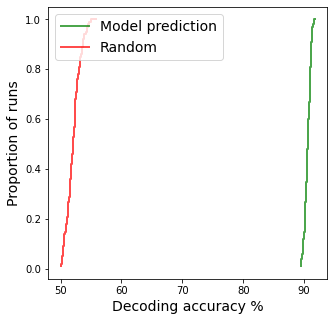

mean decoding accuracy =  90.58094041234231
mean RANDOM decoding accuracy =  52.13067926014108
54522.068385601044


In [25]:
## set SVM params, choose params to classify on, and subset cells ##

#### EDIT THIS ####
filename='TEST'
predict=['Condition'] ## variable to classify (e.g. projection, group, condition)
condition=['All Cells'] ## only used for reference in parameter file
params=np.array(data.columns[10:61]).tolist()## choose params to use for classification 

summarydata=pd.DataFrame(data)
summarydata=summarydata.replace(['mature','immature'],[1,0])
#summarydata=summarydata.replace(['ad lib','fasted'],[0,1])
# label_tag=1  ## Choose 1 for ad lib and 0 for fasted; or 1 for VTA and 0 for LHb ##

# df=summarydata[summarydata.projection == 1]  #change param as input data
df=summarydata

iterations=100
test_data=.2  #defines split for test/train sets
#####

### Run SVM for eYFP+ cells to predict group based on rheo and max latency ###
start = time.time()
ephys_svm(filename,predict,params,iterations,test_data,df)
end = time.time()
print(end - start)

# Vgat low

In [26]:
%cd "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/female/low/svm/"
data=pd.read_excel('/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/female/low/svm/metadata.xlsx')

/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/female/low/svm



Run #:  1


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6821008403361345


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5388235294117647

Run #:  2


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6683193277310925


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5307563025210084

Run #:  3


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6412655971479502


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5460784313725491

Run #:  4


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6592063492063491


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5183333333333333

Run #:  5


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6549206349206349


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5282539682539682

Run #:  6


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6794117647058823


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5529411764705883

Run #:  7


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6585714285714286


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5889075630252102

Run #:  8


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6771428571428573


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5342857142857143

Run #:  9


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6640476190476191


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5519047619047619

Run #:  10


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6828571428571427


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5493277310924369

Run #:  11


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6928571428571428


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.534453781512605

Run #:  12


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6515126050420168


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5274789915966386

Run #:  13


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6464349376114081


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5270944741532977

Run #:  14


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6726890756302522


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5478991596638656

Run #:  15


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6595238095238095


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5182539682539683

Run #:  16


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6506722689075629


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5386554621848738

Run #:  17


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6457142857142857


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5314285714285714

Run #:  18


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6926190476190476


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5882539682539683

Run #:  19


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.683968253968254


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5313492063492063

Run #:  20


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6671122994652408


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5418894830659535

Run #:  21


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.695079365079365


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5625396825396825

Run #:  22


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6834224598930483


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5105169340463458

Run #:  23


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6536974789915966


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5358823529411764

Run #:  24


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6497478991596639


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5248739495798319

Run #:  25


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6661344537815126


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5701680672268907

Run #:  26


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7029411764705882


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5411764705882354

Run #:  27


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6640819964349376


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5219251336898395

Run #:  28


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6567226890756303


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5190756302521008

Run #:  29


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6572268907563025


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.575798319327731

Run #:  30


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6596825396825396


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5161904761904763

Run #:  31


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.643109243697479


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5042857142857142

Run #:  32


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6436720142602496


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5179144385026738

Run #:  33


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6520499108734403


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5015151515151516

Run #:  34


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7139495798319329


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5635294117647058

Run #:  35


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6451201201201202


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5096846846846848

Run #:  36


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6772222222222222


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5346825396825396

Run #:  37


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6680672268907563


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5329411764705881

Run #:  38


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6872268907563026


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5449579831932773

Run #:  39


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6611764705882353


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5288235294117648

Run #:  40


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6963865546218487


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5243697478991596

Run #:  41


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6472222222222223


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5323015873015873

Run #:  42


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7067234848484848


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5446022727272728

Run #:  43


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6244537815126051


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.6067226890756303

Run #:  44


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6726050420168067


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5199999999999999

Run #:  45


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6804201680672268


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.546890756302521

Run #:  46


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6491596638655462


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5160504201680671

Run #:  47


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.67825311942959


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5708556149732621

Run #:  48


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6383333333333333


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.568095238095238

Run #:  49


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6816666666666666


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.557936507936508

Run #:  50


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6716806722689076


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5473109243697479

Run #:  51


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6444444444444444


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.51

Run #:  52


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6916221033868093


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5340463458110516

Run #:  53


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6391596638655461


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.51

Run #:  54


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6754621848739497


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5130252100840336

Run #:  55


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6975044563279857


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5318181818181819

Run #:  56


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6361344537815127


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5815126050420167

Run #:  57


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.690909090909091


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.532620320855615

Run #:  58


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.693968253968254


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5253968253968253

Run #:  59


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.680952380952381


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5483333333333332

Run #:  60


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6600840336134454


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5552941176470588

Run #:  61


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6285714285714287


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5342857142857143

Run #:  62


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6509803921568629


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.526559714795009

Run #:  63


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.651336898395722


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5236185383244207

Run #:  64


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.675798319327731


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5117647058823529

Run #:  65


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6781639928698753


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5385026737967914

Run #:  66


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6440476190476191


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5396825396825398

Run #:  67


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6838680926916221


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5118538324420678

Run #:  68


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6714285714285715


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5362184873949579

Run #:  69


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6688057040998218


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5311942959001783

Run #:  70


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6769047619047619


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5338095238095237

Run #:  71


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6434126984126984


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5422222222222223

Run #:  72


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6836134453781513


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5379831932773109

Run #:  73


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6593843843843843


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5193693693693694

Run #:  74


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6420677361853833


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5236185383244207

Run #:  75


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6675579322638148


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5379679144385026

Run #:  76


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6590909090909092


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5573083778966132

Run #:  77


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6813445378151262


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5659663865546218

Run #:  78


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7074603174603175


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.518015873015873

Run #:  79


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5514285714285714

Run #:  80


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.636218487394958


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5552100840336134

Run #:  81


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6472222222222221


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5222222222222223

Run #:  82


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.683781512605042


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.574201680672269

Run #:  83


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6624369747899158


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5215126050420167

Run #:  84


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6366310160427808


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5568627450980392

Run #:  85


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6818253968253967


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5383333333333333

Run #:  86


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6585714285714286


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5432539682539683

Run #:  87


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6721428571428572


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5327777777777778

Run #:  88


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6478571428571429


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5546825396825397

Run #:  89


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6729411764705883


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.527563025210084

Run #:  90


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6592063492063491


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.532063492063492

Run #:  91


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6361344537815127


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5057142857142857

Run #:  92


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6653174603174603


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5354761904761904

Run #:  93


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6663492063492062


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.517063492063492

Run #:  94


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6571428571428571


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5257142857142857

Run #:  95


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5235294117647059

Run #:  96


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6764285714285714


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.527063492063492

Run #:  97


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6873015873015872


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5028571428571429

Run #:  98


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.68


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5199999999999999

Run #:  99


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6559523809523811


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5323015873015873

Run #:  100


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.6724369747899159
shuffled accuracy =  0.5733613445378152


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


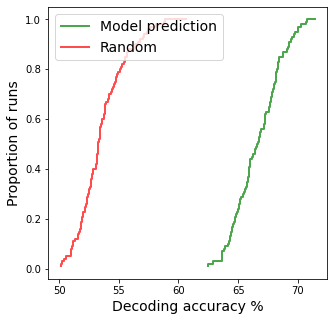

mean decoding accuracy =  66.69815948922569
mean RANDOM decoding accuracy =  53.68316910158823
27318.125257253647


In [27]:
## set SVM params, choose params to classify on, and subset cells ##

#### EDIT THIS ####
filename='TEST'
predict=['Condition'] ## variable to classify (e.g. projection, group, condition)
condition=['All Cells'] ## only used for reference in parameter file
params=np.array(data.columns[10:65]).tolist()## choose params to use for classification 

summarydata=pd.DataFrame(data)
summarydata=summarydata.replace(['mature','immature'],[1,0])
#summarydata=summarydata.replace(['ad lib','fasted'],[0,1])
# label_tag=1  ## Choose 1 for ad lib and 0 for fasted; or 1 for VTA and 0 for LHb ##

# df=summarydata[summarydata.projection == 1]  #change param as input data
df=summarydata

iterations=100
test_data=.2  #defines split for test/train sets
#####

### Run SVM for eYFP+ cells to predict group based on rheo and max latency ###
start = time.time()
ephys_svm(filename,predict,params,iterations,test_data,df)
end = time.time()
print(end - start)

# Vgat-Ar

In [28]:
%cd "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/female/Ar/svm/"
data=pd.read_excel('/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/female/Ar/svm/metadata.xlsx')

/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/female/Ar/svm



Run #:  1


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7276315789473685
shuffled accuracy =  0.5039473684210527

Run #:  2


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7295454545454545


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5202836637047163

Run #:  3


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7235133287764868


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5606117566643882

Run #:  4


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7368964368964369


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5244921744921744

Run #:  5


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7359535201640466


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5176520847573479

Run #:  6


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7204430379746836


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5158544303797469

Run #:  7


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7389043209876542
shuffled accuracy =  0.524320987654321

Run #:  8


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7278221778221778


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5327672327672327

Run #:  9


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7215495495495495
shuffled accuracy =  0.5222522522522522

Run #:  10


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7418857513794224
shuffled accuracy =  0.5215189873417722

Run #:  11


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7313226247436775
shuffled accuracy =  0.5423615857826384

Run #:  12


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.733981981981982
shuffled accuracy =  0.5087747747747746

Run #:  13


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7352482960077896
shuffled accuracy =  0.5312885426809477

Run #:  14


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7326725905673275


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5304682159945318

Run #:  15


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7321052631578947
shuffled accuracy =  0.5363684210526316

Run #:  16


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.726923076923077


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5384615384615384

Run #:  17


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.733339029391661
shuffled accuracy =  0.5123547505126452

Run #:  18


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7173274094326725
shuffled accuracy =  0.5308783321941217

Run #:  19


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7367567567567568
shuffled accuracy =  0.5426306306306307

Run #:  20


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7309152872444011
shuffled accuracy =  0.5350535540408957

Run #:  21


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7302882882882884
shuffled accuracy =  0.5220360360360361

Run #:  22


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7277831872768582
shuffled accuracy =  0.5216975008114249

Run #:  23


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7206751054852321
shuffled accuracy =  0.5095748133722817

Run #:  24


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7247809152872444


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5140863356053229

Run #:  25


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7588769879909121


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5342745861733202

Run #:  26


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7510323010323011
shuffled accuracy =  0.5025974025974026

Run #:  27


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7233157894736842


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5046140350877193

Run #:  28


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.724423888347939
shuffled accuracy =  0.5135183382018825

Run #:  29


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7377719298245615


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5309122807017543

Run #:  30


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7374914559125085
shuffled accuracy =  0.5176691729323307

Run #:  31


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.73080997949419


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5374401913875598

Run #:  32


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7233684210526317
shuffled accuracy =  0.5370175438596492

Run #:  33


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7475905673274095
shuffled accuracy =  0.5110560492139439

Run #:  34


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7434565434565434
shuffled accuracy =  0.523959373959374

Run #:  35


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7393354430379748


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.531629746835443

Run #:  36


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7154912280701754


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5405438596491228

Run #:  37


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7410256410256411


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.535897435897436

Run #:  38


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.732701754385965
shuffled accuracy =  0.510561403508772

Run #:  39


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7307245386192756


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5196855775803145

Run #:  40


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7196527101590392
shuffled accuracy =  0.5153034728984096

Run #:  41


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7308191808191808
shuffled accuracy =  0.5491674991674992

Run #:  42


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7483684210526315
shuffled accuracy =  0.5449824561403509

Run #:  43


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7331012658227849
shuffled accuracy =  0.5233860759493671

Run #:  44


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7367224880382774


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5229835953520163

Run #:  45


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7136530136530136
shuffled accuracy =  0.5226773226773227

Run #:  46


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7354754949691659


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.517851346965271

Run #:  47


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.713140350877193
shuffled accuracy =  0.5350350877192982

Run #:  48


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7395762132604238
shuffled accuracy =  0.5299384825700615

Run #:  49


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.735589094449854
shuffled accuracy =  0.5127555988315482

Run #:  50


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7351332877648667
shuffled accuracy =  0.5228298017771701

Run #:  51


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7227848101265824


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5139240506329115

Run #:  52
prediction accuracy =  0.7326673326673327


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5188977688977688

Run #:  53


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.721944721944722


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5051781551781552

Run #:  54


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7495293735800066
shuffled accuracy =  0.5336903602726387

Run #:  55


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7100000000000001
shuffled accuracy =  0.5175000000000001

Run #:  56


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7365634365634366


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5269397269397269

Run #:  57


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7187286397812713


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5032809295967191

Run #:  58


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7475087719298246
shuffled accuracy =  0.5346140350877193

Run #:  59


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7545454545454545


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5154179154179153

Run #:  60


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7318181818181817
shuffled accuracy =  0.5148851148851149

Run #:  61


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7341123012009089
shuffled accuracy =  0.5070269393054203

Run #:  62


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7412807017543861


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.506

Run #:  63


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7422280701754386


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5225263157894735

Run #:  64


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7085037325543655


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5246348588120741

Run #:  65


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7521145521145521


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5058441558441558

Run #:  66


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7067156527682843


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5019480519480519

Run #:  67


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7625041625041625


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5109057609057609

Run #:  68


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7435759493670886


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5245886075949368

Run #:  69


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7415750915750915


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5303862803862803

Run #:  70


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7295625427204374


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5357313738892686

Run #:  71


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7288378288378288


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5097236097236097

Run #:  72


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7406260406260408


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5272061272061273

Run #:  73


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7473859473859473


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5154678654678655

Run #:  74


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7215451215451216


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5226273726273727

Run #:  75


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7309808612440192


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5753759398496241

Run #:  76


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7421052631578947


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5276315789473685

Run #:  77


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7275397598182409


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5044303797468355

Run #:  78


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.711165206101915


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5127880558260305

Run #:  79


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7370658876987991


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5133722817267121

Run #:  80


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.746298245614035


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5270877192982455

Run #:  81


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7547062641999351


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5095585848750406

Run #:  82


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7342438271604937


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5154783950617283

Run #:  83


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7083739045764362


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5037974683544304

Run #:  84


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7224109224109225


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5346653346653347

Run #:  85


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7186602870813397


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5111756664388244

Run #:  86


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7161483253588516


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5352358168147642

Run #:  87


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7538461538461539


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5166666666666666

Run #:  88


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7314019314019314


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5122544122544123

Run #:  89


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7485847485847485


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5203296703296703

Run #:  90


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7324675324675324


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5454545454545454

Run #:  91


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7403096903096903


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5205627705627706

Run #:  92


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7448051948051948


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5355644355644356

Run #:  93


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7330656185919343


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5215823650034176

Run #:  94


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7273226773226774


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5187146187146187

Run #:  95


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7142522522522523


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5200540540540539

Run #:  96


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7270334928229665


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5412508544087492

Run #:  97


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7206491228070175


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5317017543859649

Run #:  98


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7240943267259057


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5512816131237185

Run #:  99


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7266666666666668


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


shuffled accuracy =  0.5279999999999999

Run #:  100


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


prediction accuracy =  0.7334757347915243
shuffled accuracy =  0.5078434723171565


/home/garret/anaconda3/envs/HR/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


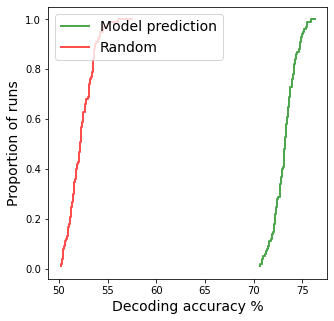

mean decoding accuracy =  73.23124527541184
mean RANDOM decoding accuracy =  52.33882753887396
56252.43637251854


In [29]:
## set SVM params, choose params to classify on, and subset cells ##

#### EDIT THIS ####
filename='TEST'
predict=['Condition'] ## variable to classify (e.g. projection, group, condition)
condition=['All Cells'] ## only used for reference in parameter file
params=np.array(data.columns[10:65]).tolist()## choose params to use for classification 

summarydata=pd.DataFrame(data)
summarydata=summarydata.replace(['mature','immature'],[1,0])
#summarydata=summarydata.replace(['ad lib','fasted'],[0,1])
# label_tag=1  ## Choose 1 for ad lib and 0 for fasted; or 1 for VTA and 0 for LHb ##

# df=summarydata[summarydata.projection == 1]  #change param as input data
df=summarydata

iterations=100
test_data=.2  #defines split for test/train sets
#####

### Run SVM for eYFP+ cells to predict group based on rheo and max latency ###
start = time.time()
ephys_svm(filename,predict,params,iterations,test_data,df)
end = time.time()
print(end - start)